# EX2 - O Peso de Turingópolis


## Setup

### Importanto bibliotecas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Carregando o dataset:

In [2]:
# Carregando o df
df = pd.read_csv('dataset2.xls')

### Informações básicas sobre o dataset:

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     10000 non-null  object 
 1   age     10000 non-null  int64  
 2   height  10000 non-null  float64
 3   weight  10000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB


,age,height,weight
count,10000.000000,10000.000000,10000.000000
mean,42.171700,1.708993,88.910496
std,16.425919,0.099272,33.328269
min,14.000000,1.376462,17.970189
25%,28.000000,1.636008,69.394196
50%,42.000000,1.702588,83.518259
75%,57.000000,1.776343,99.050654
max,70.000000,2.054139,335.295817


## Questão A

Gerando um gráfico de scatter para peso/altura:

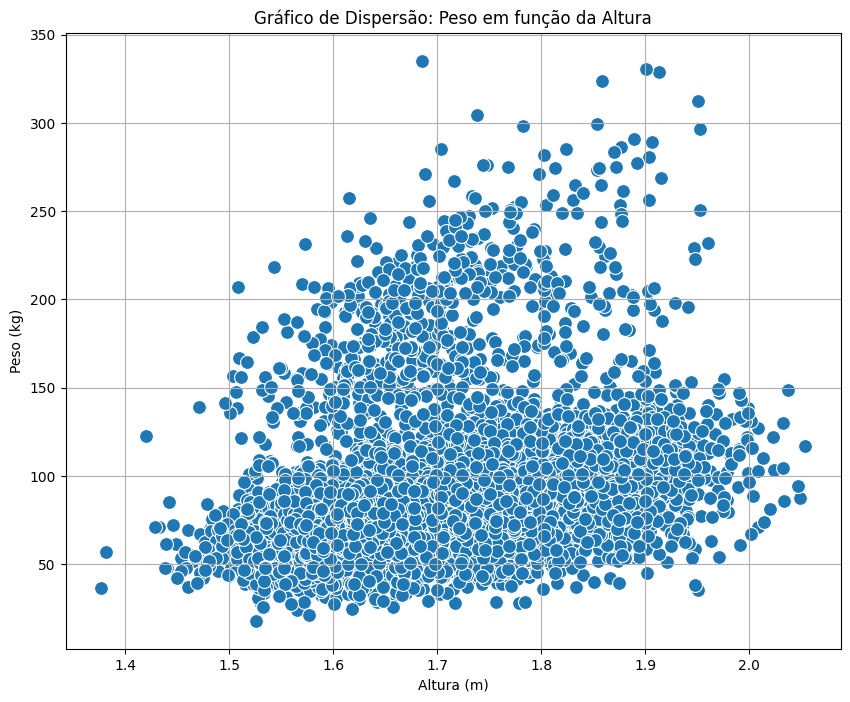

In [4]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x='height', y='weight', data=df, s=100)
plt.xlabel('Altura (m)')
plt.ylabel('Peso (kg)')
plt.title('Gráfico de Dispersão: Peso em função da Altura')
plt.grid(True)
plt.show()

Padronizando a coluna de sexo:

In [5]:
sex_mapping = {
    'M': 'M',
    'F': 'F',
    'male': 'M',
    'female': 'F'
}

df['sex'] = df['sex'].map(sex_mapping)


Gerando um gráfico scatter para sexo masculino e feminino:

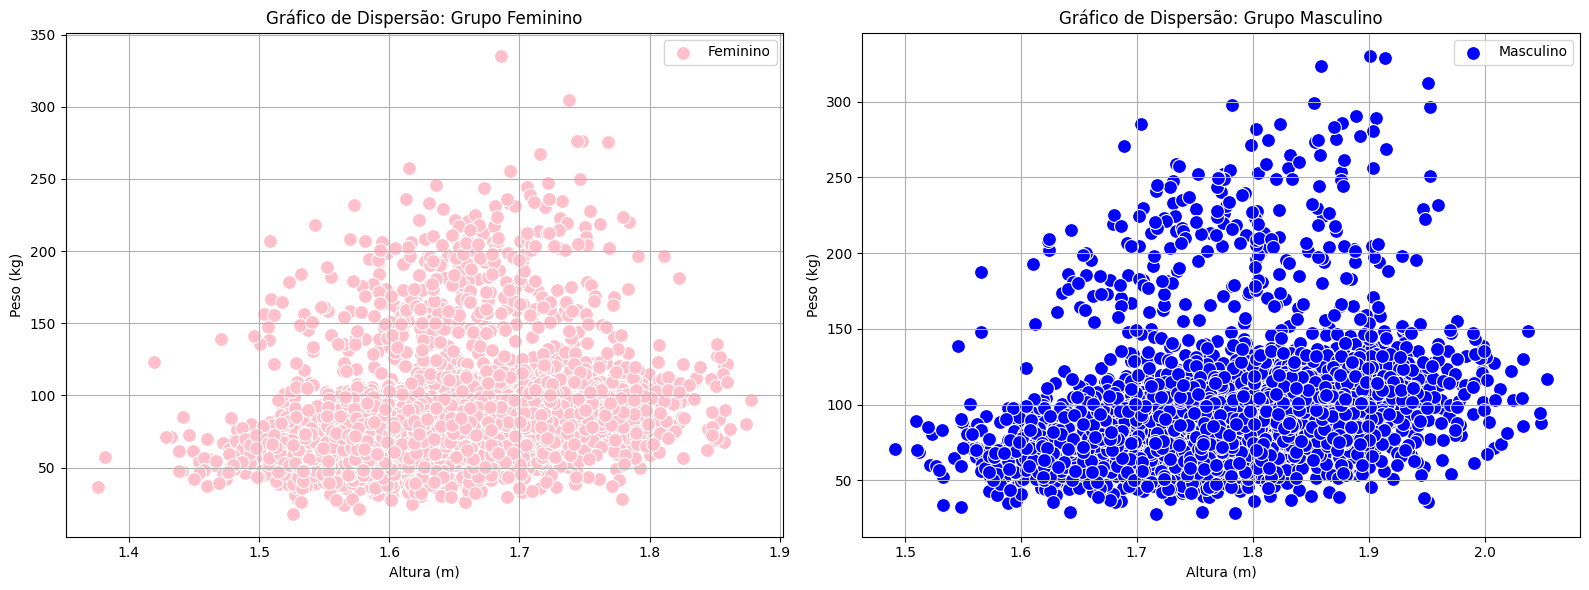

In [6]:
# Filtrando o DataFrame por sexo:
df_female = df[df['sex'] == 'F']
df_male = df[df['sex'] == 'M']

# Criando o subplot com dois gráficos de dispersão
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico para o grupo feminino
sns.scatterplot(x='height', y='weight', data=df_female, s=100, color='pink', label='Feminino', ax=axes[0])
axes[0].set_xlabel('Altura (m)')
axes[0].set_ylabel('Peso (kg)')
axes[0].set_title('Gráfico de Dispersão: Grupo Feminino')
axes[0].legend()
axes[0].grid(True)

# Gráfico para o grupo masculino
sns.scatterplot(x='height', y='weight', data=df_male, s=100, color='blue', label='Masculino', ax=axes[1])
axes[1].set_xlabel('Altura (m)')
axes[1].set_ylabel('Peso (kg)')
axes[1].set_title('Gráfico de Dispersão: Grupo Masculino')
axes[1].legend()
axes[1].grid(True)


plt.tight_layout()
plt.show()


**Conclusões:**

A análise dos dados revela uma tendência crescente entre altura e peso tanto para indivíduos do sexo masculino quanto feminino. No entanto, há uma grande dispersão de dados, indicando que existe uma variação significativa de pesos para uma dada altura. Além disso, notamos a presença de outliers, como indivíduos com mais de 2 metros de altura e mais de 350 quilos de peso.

## Questão B

Buscando dados ausentes:

In [7]:
dados_ausentes = df.isnull().sum()
print(dados_ausentes)

sex       0
age       0
height    0
weight    0
dtype: int64


Features com formatação incosistente:

In [8]:
print(df.sex.unique()) #Foi consertado anteriormente para fazer o gráfico de peso/altura/sexo
print(df.age.unique())

['M' 'F']
[62 44 49 25 65 57 56 67 16 37 36 38 68 66 51 53 63 35 24 59 58 33 54 47
 70 46 41 50 32 40 31 28 30 21 20 27 29 14 18 69 26 42 64 19 43 48 22 23
 55 52 45 15 17 34 39 61 60]


Dados repetidos:

In [9]:
# Encontrando duplicatas com combinações idênticas de "altura" e "peso"
duplicated_combinations = df[df.duplicated(subset=['height', 'weight'], keep=False)]

# Verificando a frequência das duplicatas
duplicate_count = duplicated_combinations.groupby(['height', 'weight']).size()

print(duplicate_count)

Series([], dtype: int64)


Outliers:

In [10]:
age_outliers = df[(df['age'] < 0) | (df['age'] > 120)]
height_outliers = df[(df['height'] < 0) | (df['height'] > 3.0)]  # Considerando uma faixa razoável de alturas
weight_outliers = df[(df['weight'] < 0) | (df['weight'] > 300)]   # Considerando uma faixa razoável de pesos

print("Valores fora do intervalo esperado na coluna 'age':")
print(age_outliers)

print("Valores fora do intervalo esperado na coluna 'height':")
print(height_outliers)

print("Valores fora do intervalo esperado na coluna 'weight':")
print(weight_outliers)

Valores fora do intervalo esperado na coluna 'age':
Empty DataFrame
Columns: [sex, age, height, weight]
Index: []
Valores fora do intervalo esperado na coluna 'height':
Empty DataFrame
Columns: [sex, age, height, weight]
Index: []
Valores fora do intervalo esperado na coluna 'weight':
     sex  age    height      weight
667    M   25  1.858842  323.677911
987    F   40  1.685739  335.295817
6518   M   24  1.950770  312.309805
6534   M   63  1.913778  328.824351
8645   F   45  1.737921  304.368483
9630   M   58  1.901061  330.423095


**Conclusões**

Podemos concluir que, durante o processo de integração dos dois conjuntos, surgiram duas inconsistências: a formatação da variável "sexo", que apresentava os valores "female", "male", "M" e "F", e valores improváveis na variável "weight".

## Questão C

In [11]:
# Criando a coluna IMC
df['IMC'] = df['weight'] / (df['height'] ** 2)
df.IMC.describe()

count    10000.000000
mean        30.349851
std         10.822243
min          7.715833
25%         24.389122
50%         28.626742
75%         33.259582
max        117.990575
Name: IMC, dtype: float64

## Questão D

**Outliers univariados** referem-se a valores extremos em uma única variável. 
**Outliers multivariados**, por outro lado, envolvem valores atípicos que podem ser identificados somente quando consideramos a interação entre diferentes variáveis. Um exemplo de outlier multivariado poderia ser encontrado no gráfico de altura por peso, como uma pessoa com um peso extremo para o esperado na sua faixa de altura.

Para identificar outliers na coluna IMC, podemos usar uma abordagem estatística com base no conceito de "z-score". O z-score é uma medida que indica quantos desvios padrão um ponto de dados está da média. Comumente, considera-se que valores de z-score maiores que 3 (positivos ou negativos) são potenciais outliers.

In [12]:
# Calculando o z-score da coluna IMC
df['z_score'] = np.abs((df['IMC'] - df['IMC'].mean()) / df['IMC'].std())

# Identificando os outliers usando um limiar de z-score maior que 3
outliers_indices = df[df['z_score'] > 3].index

outliers = df[df['z_score'] > 3]

# Exibindo os outliers:
print("Outliers na coluna IMC:")
print(outliers)


# Removendo os outliers do DataFrame:
df_cleaned = df.drop(outliers_indices)


Outliers na coluna IMC:
     sex  age    height      weight        IMC   z_score
109    M   50  1.793294  239.725751  74.543837  4.083625
125    F   29  1.704572  212.760802  73.225232  3.961783
127    M   37  1.731016  247.372127  82.556038  4.823971
144    F   70  1.673319  192.397924  68.713625  3.544900
169    F   31  1.506513  147.574700  65.022895  3.203868
...   ..  ...       ...         ...        ...       ...
9791   F   66  1.615572  257.235961  98.555117  6.302323
9816   F   50  1.668390  205.204407  73.721055  4.007598
9920   F   66  1.726956  203.519287  68.240630  3.501195
9922   F   16  1.495831  141.220076  63.114866  3.027562
9984   F   45  1.632982  177.514903  66.569010  3.346733

[312 rows x 6 columns]


Neste caso, como o IMC explicita a relação entre duas variáveis (peso e altura), podemos considerar esses outliers como multivariados.

## Questão E

In [13]:
#Encontrando a parcela "não-saudável":
nao_saudavel = df_cleaned[(df_cleaned['IMC'] < 18.5) | (df_cleaned['IMC'] > 24.9)].shape[0]

# Calculando a porcentagem:
p_nao_saudavel = (nao_saudavel / len(df_cleaned)) * 100

print(f"Porcentagem da população fora da condição 'saudável': {p_nao_saudavel:.2f}%")


Porcentagem da população fora da condição 'saudável': 76.89%


## Questão F

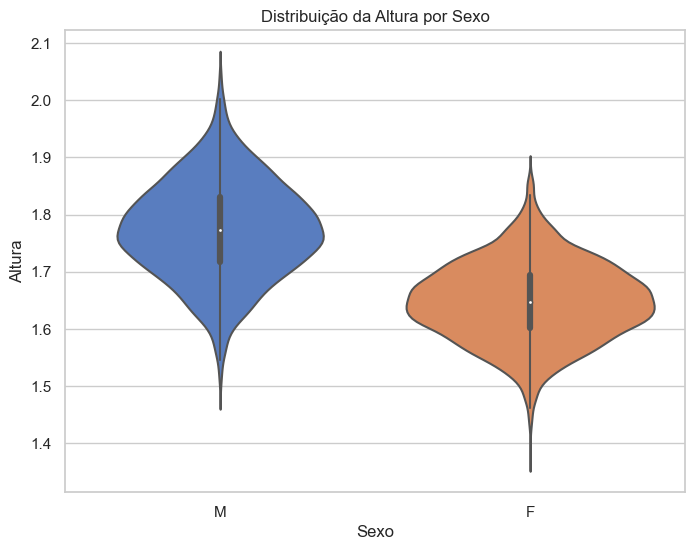

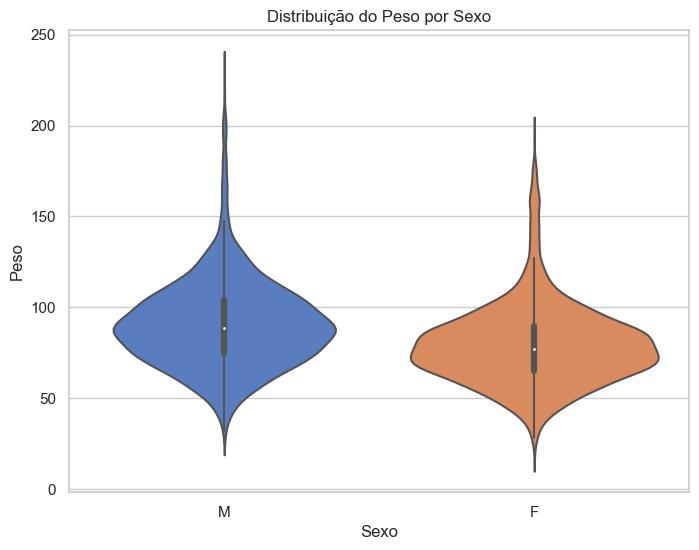

In [14]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.violinplot(x='sex', y='height', data=df_cleaned, palette='muted')
plt.title('Distribuição da Altura por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Altura')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(x='sex', y='weight', data=df_cleaned, palette='muted')
plt.title('Distribuição do Peso por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Peso')
plt.show()

**Conclusões:**

Podemos observar diferenças significativas na distribuição da altura e do peso entre homens e mulheres. No geral, os homens são mais altos e mais pesados do que as mulheres. Os gráficos de peso para ambos os sexos são mais próximos, indicando uma maior similaridade nessa variável. Por outro lado, os gráficos de altura mostram uma diferença mais pronunciada.

A maioria tanto dos homens quanto das mulheres tem pesos entre 50 kg e 100 kg, porém, notamos que a quantidade de homens com mais de 100 kg é maior do que a quantidade de mulheres nessa faixa de peso.

Em relação à altura, a maioria dos homens apresenta alturas entre 1,70 m e 1,90 m, enquanto as mulheres têm alturas entre 1,55 m e 1,75 m, demonstrando uma diferença média de estatura entre os sexos.